In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['agg.path.chunksize'] = 10000
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [3]:
tracks_data_path = "C:/Users/karra/Desktop/ml_music/tracks.csv"

In [4]:
tracks_data = pd.read_csv(tracks_data_path)

In [5]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

# Some Basic Info and Tasks

## There are 586,672 entries in the dataset. There are 20 features in total of which "id", "name", "id_artists" are not expected to carry much information for any task. Get rid of these columns.

## After that, replace the values in the "release_date" column with just the year as an integer to make it easier to work with those values later.

In [6]:
tracks_data = tracks_data.drop(["id", "name", "id_artists"], axis=1)
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586672 non-null  int64  
 1   duration_ms       586672 non-null  int64  
 2   explicit          586672 non-null  int64  
 3   artists           586672 non-null  object 
 4   release_date      586672 non-null  object 
 5   danceability      586672 non-null  float64
 6   energy            586672 non-null  float64
 7   key               586672 non-null  int64  
 8   loudness          586672 non-null  float64
 9   mode              586672 non-null  int64  
 10  speechiness       586672 non-null  float64
 11  acousticness      586672 non-null  float64
 12  instrumentalness  586672 non-null  float64
 13  liveness          586672 non-null  float64
 14  valence           586672 non-null  float64
 15  tempo             586672 non-null  float64
 16  time_signature    58

In [8]:
bad_year_ind = []
#tracks_data2 = tracks_data.copy()
for i in range(tracks_data.shape[0]):
    year = tracks_data.at[i, "release_date"]
    if(len(year) < 4):
        bad_year_ind.append(i)
        #tracks_data.iloc[i].loc["release_date"] = int(year)
        tracks_data.at[i,"release_date"] = int(year)
    else:
        year = year[0:4]
        #tracks_data.iloc[i].loc["release_date"] = "NA"
        #bad_year_ind.append(i)
        tracks_data.at[i,"release_date"] = int(year)

tracks_data.rename(columns={"release_date":"year"}, inplace=True)
tracks_data.sort_values(by="year", inplace=True)

In [9]:
print("Number of bad values in the release_date column= ",len(bad_year_ind))
tracks_data.info()

Number of bad values in the release_date column=  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 586672 entries, 478627 to 444564
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586672 non-null  int64  
 1   duration_ms       586672 non-null  int64  
 2   explicit          586672 non-null  int64  
 3   artists           586672 non-null  object 
 4   year              586672 non-null  object 
 5   danceability      586672 non-null  float64
 6   energy            586672 non-null  float64
 7   key               586672 non-null  int64  
 8   loudness          586672 non-null  float64
 9   mode              586672 non-null  int64  
 10  speechiness       586672 non-null  float64
 11  acousticness      586672 non-null  float64
 12  instrumentalness  586672 non-null  float64
 13  liveness          586672 non-null  float64
 14  valence           586672 non-null  float64
 15  tempo      

### The "release_date" has been renamed to "year". There are no bad values in the column.

### Plot a histogram of number of tracks based on the year of release.

Text(0.5, 1.0, 'Histrogram of tracks based on year of release')

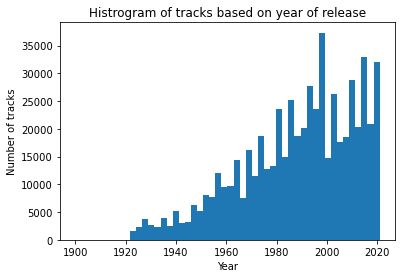

In [23]:
q = tracks_data.year.values
plt.hist(q, bins=50)
#plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Number of tracks")
plt.title("Histrogram of tracks based on year of release")

## Let's look at the trends in some of the attributes that are given for the tracks (energy, danceability etc.)

### Question: What has the trend been in the energy of the music over time?

### To find out, compute the median energy in songs for each decade and plot those values. Use bootstrap for better measurement. 

In [34]:
median_energy_decade = []
for y in range(1900,2020,10):
    df = tracks_data[(tracks_data.year >= y) & (tracks_data.year < y+10)]
    if(df.energy.shape[0]>0):
        e = bs.bootstrap(df.energy.values,stat_func=bs_stats.median)
        median_energy_decade.append((e.value, y+10))

Text(0.5, 1.0, 'Energy of songs across decades')

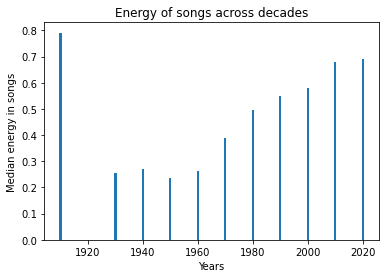

In [44]:
energy_values = [x[0] for x in median_energy_decade]
decade_values = [x[1] for x in median_energy_decade]
plt.bar(decade_values,energy_values)
plt.xlabel("Years")
plt.ylabel("Median energy in songs")
plt.title("Energy of songs across decades")

### There is only one song in the dataset between 1900 and 1920 and it happens to have a high energy score. That's why the first energy value is so high. But looking at the rest of the plot, it would appear that songs have gotten more energetic as the years went by.  

### Question: What has the trend been in the tempo and danceability of the music over time?

In [45]:
median_tempo_decade = []
median_dance_decade = []
for y in range(1900,2020,10):
    df = tracks_data[(tracks_data.year >= y) & (tracks_data.year < y+10)]
    if(df.tempo.shape[0]>0):
        e = bs.bootstrap(df.tempo.values,stat_func=bs_stats.median)
        median_tempo_decade.append((e.value, y+10))
    if(df.danceability.shape[0]>0):
        e = bs.bootstrap(df.danceability.values,stat_func=bs_stats.median)
        median_dance_decade.append((e.value, y+10))

Text(0.5, 1.0, 'Danceability of songs across decades')

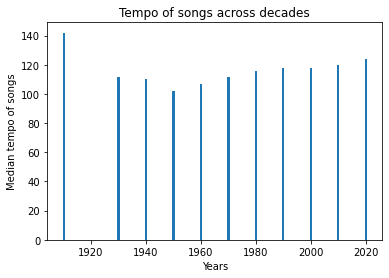

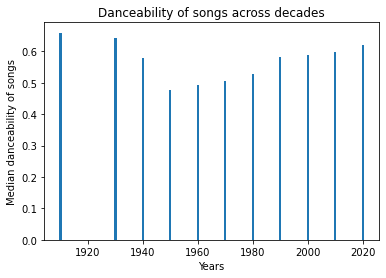

In [46]:
tempo_values = [x[0] for x in median_tempo_decade]
decade_values = [x[1] for x in median_tempo_decade]
plt.figure(1)
plt.bar(decade_values,tempo_values)
plt.xlabel("Years")
plt.ylabel("Median tempo of songs")
plt.title("Tempo of songs across decades")

dance_values = [x[0] for x in median_dance_decade]
decade_values = [x[1] for x in median_dance_decade]
plt.figure(2)
plt.bar(decade_values, dance_values)
plt.xlabel("Years")
plt.ylabel("Median danceability of songs")
plt.title("Danceability of songs across decades")

# 1. Focus: Artists

## The name of an artist is actually very important because it is well known that famous artists get listened to more often than not so popular ones by default, driving up their popularity further with every release. But to really account for such relationships between the artist's name and their song's popularity will require a different kind of data which isn't present in this dataset. Nevertheless, the name of the artist can still be useful to answer interesting questions like:
### 1. What is the average song length for any given artist?
### 2. Which artists have high energy scores? Do the findings match with what we would expect based on our knowledge of their music?
### 3. Based on the year of release, are there significant changes in the loudness, energy, daceability, acousticness etc. for any given artist? 
### 4. Based on the answers found in 3, is there any correlation between artists whose song's features changed with the years and their popularity?